## Regulating Temperature in a Smart AC based on User Thermal Comfort

<b>HETAL ATWAL (20BAI1105) <br>
VARSHA SHARMA (20BAI1190) <br>
SRIGANESH RAJ (20BAI1181) <br>
MEGHNA SINHA (20BAI1133)</b>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbs

In [2]:
data = pd.read_csv("dataset.csv")

In [3]:
data.head()

,Device ID,Time,Setting temperature,Setting temperature change,Operation mode,Setting airspeed,Indoor air temperature,Outdoor air temperature,Month,Hour,Rounding of setting temperature,Increase/Decrease temperature,Temperature difference between indoor and outdoor,Temperature difference between setting and indoor,Rounding of indoor air temperature,Rounding of outdoor temperature,Rounding of temperature difference between indoor and outdoor,Rounding of temperature difference between setting and indoor,Dataset
0,1.605290e+14,01-06-2020 14:53,16.0,0.0,2,102,27.9,30.4,6,14,16,0,-2.5,-11.9,28,30,-2,-12,1
1,1.605290e+14,01-06-2020 14:53,16.0,0.0,2,102,27.9,30.5,6,14,16,0,-2.6,-11.9,28,30,-2,-12,1
2,1.605290e+14,01-06-2020 14:54,16.0,0.0,2,102,28.6,31.0,6,14,16,0,-2.4,-12.6,29,31,-2,-13,1
3,1.605290e+14,01-06-2020 15:09,16.0,0.0,2,102,25.6,33.2,6,15,16,0,-7.6,-9.6,26,33,-7,-10,1
4,1.605290e+14,01-06-2020 15:16,16.0,0.0,2,102,25.9,33.2,6,15,16,0,-7.3,-9.9,26,33,-7,-10,1


### Data cleaning

In [4]:
data = data.drop(columns=['Device ID', 'Time', 'Dataset'])

In [5]:
y = data['Setting temperature']
x = data.drop(columns=['Setting temperature'])

In [6]:
x

,Setting temperature change,Operation mode,Setting airspeed,Indoor air temperature,Outdoor air temperature,Month,Hour,Rounding of setting temperature,Increase/Decrease temperature,Temperature difference between indoor and outdoor,Temperature difference between setting and indoor,Rounding of indoor air temperature,Rounding of outdoor temperature,Rounding of temperature difference between indoor and outdoor,Rounding of temperature difference between setting and indoor
0,0.0,2,102,27.9,30.4,6,14,16,0,-2.5,-11.9,28,30,-2,-12
1,0.0,2,102,27.9,30.5,6,14,16,0,-2.6,-11.9,28,30,-2,-12
2,0.0,2,102,28.6,31.0,6,14,16,0,-2.4,-12.6,29,31,-2,-13
3,0.0,2,102,25.6,33.2,6,15,16,0,-7.6,-9.6,26,33,-7,-10
4,0.0,2,102,25.9,33.2,6,15,16,0,-7.3,-9.9,26,33,-7,-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745461,0.0,4,100,33.0,2.0,12,18,28,0,31.0,-4.5,33,2,31,-5
745462,0.0,4,100,33.3,1.4,12,19,28,0,31.9,-4.8,33,1,32,-5
745463,0.0,4,100,33.3,1.3,12,19,28,0,32.0,-4.8,33,1,32,-5
745464,0.0,4,100,33.5,1.9,12,20,28,0,31.6,-5.0,34,2,32,-6


<AxesSubplot:>

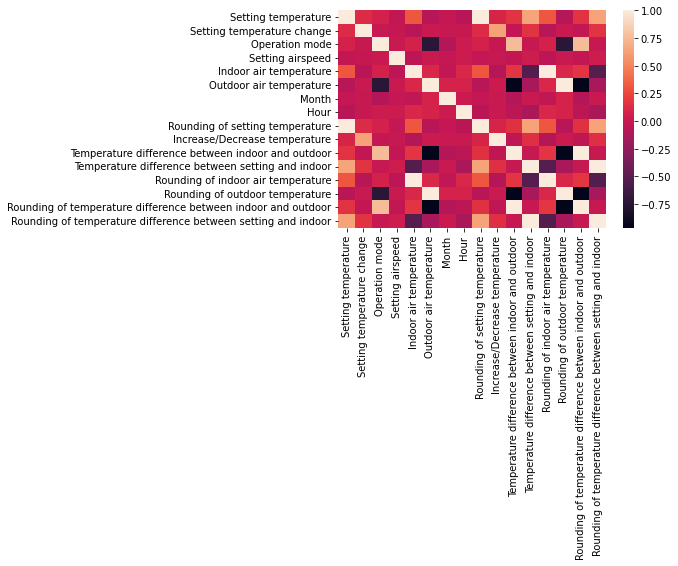

In [7]:
sbs.heatmap(data.corr())

In [8]:
cor = data.corr()
cor['Setting temperature']

Setting temperature                                              1.000000
Setting temperature change                                       0.119935
Operation mode                                                   0.067322
Setting airspeed                                                -0.021717
Indoor air temperature                                           0.306801
Outdoor air temperature                                         -0.075676
Month                                                           -0.019543
Hour                                                            -0.066908
Rounding of setting temperature                                  0.995764
Increase/Decrease temperature                                    0.082140
Temperature difference between indoor and outdoor                0.158241
Temperature difference between setting and indoor                0.640101
Rounding of indoor air temperature                               0.304845
Rounding of outdoor temperature       

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns
vif

c:\Users\dell\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,1.673877e+00,Setting temperature change
1,2.106015e+01,Operation mode
2,1.182246e+01,Setting airspeed
3,inf,Indoor air temperature
4,inf,Outdoor air temperature
5,1.067616e+01,Month
6,3.149738e+00,Hour
7,7.035264e+08,Rounding of setting temperature
8,1.666457e+00,Increase/Decrease temperature
9,inf,Temperature difference between indoor and outdoor


In [10]:
x = x[['Outdoor air temperature', 'Month', 'Hour']]

In [11]:
# x = x.drop(columns=['Operation mode', 'Setting airspeed', 'Outdoor air temperature', 'Increase/Decrease temperature',
#                 'Rounding of outdoor temperature'])

In [12]:
x

,Outdoor air temperature,Month,Hour
0,30.4,6,14
1,30.5,6,14
2,31.0,6,14
3,33.2,6,15
4,33.2,6,15
...,...,...,...
745461,2.0,12,18
745462,1.4,12,19
745463,1.3,12,19
745464,1.9,12,20


In [13]:
x.isnull().sum()

Outdoor air temperature    0
Month                      0
Hour                       0
dtype: int64

In [14]:
x = pd.DataFrame(x)
x

,Outdoor air temperature,Month,Hour
0,30.4,6,14
1,30.5,6,14
2,31.0,6,14
3,33.2,6,15
4,33.2,6,15
...,...,...,...
745461,2.0,12,18
745462,1.4,12,19
745463,1.3,12,19
745464,1.9,12,20


### Train test split

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=101, shuffle = True)

### Building the model

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
linear_reg_model = LinearRegression()

In [18]:

linear_reg_model.fit(X_train, Y_train)

LinearRegression()

In [19]:

print(linear_reg_model.intercept_)

27.060230117500417


In [20]:
coeff = pd.DataFrame(linear_reg_model.coef_, x.columns, columns=['Coefficient'])
coeff

,Coefficient
Outdoor air temperature,-0.021176
Month,-0.016603
Hour,-0.022016


### Predictions from the model

In [21]:
predictions = linear_reg_model.predict(X_test)

In [22]:
from sklearn import metrics

In [23]:
print('MAE: ', metrics.mean_absolute_error(Y_test, predictions))
print('MSE: ', metrics.mean_squared_error(Y_test, predictions))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

MAE:  1.9075047409460337
MSE:  7.550479247739992
RMSE:  2.747813539478251


In [25]:
X_test

,Outdoor air temperature,Month,Hour
203935,37.1,8,14
276210,27.2,6,22
17965,39.2,8,13
426414,31.2,6,0
372565,34.0,7,9
...,...,...,...
112198,29.9,7,1
581683,10.9,11,19
364779,27.6,8,8
546401,29.0,8,2


In [26]:
np.array(X_test['Outdoor air temperature'])

array([37.1, 27.2, 39.2, ..., 27.6, 29. , 26. ])

In [27]:
X_test['Predicted AC temperature'] = predictions
X_test

,Outdoor air temperature,Month,Hour,Predicted AC temperature
203935,37.1,8,14,25.833529
276210,27.2,6,22,25.900250
17965,39.2,8,13,25.811076
426414,31.2,6,0,26.299908
372565,34.0,7,9,26.025862
...,...,...,...,...
112198,29.9,7,1,26.288817
581683,10.9,11,19,26.228457
364779,27.6,8,8,26.166804
546401,29.0,8,2,26.269256


In [30]:
X_test.to_csv('output.csv')

In [ ]:
indoor = data['Outdoor air temperature']
settingTemp = data['Setting temperature']
for i in range(len(indoor)):
    if(indoor[i]>35):
        print(i, indoor[i], settingTemp[i])

21 35.1 16.0
22 35.5 16.0
23 35.1 16.0
24 35.2 16.0
25 35.1 16.0
32 35.7 16.0
33 36.5 16.0
34 39.5 16.0
35 39.3 16.0
36 39.5 16.0
37 39.2 16.0
38 39.3 16.0
39 39.3 16.0
40 39.4 16.0
41 38.9 16.0
42 39.1 16.0
43 39.1 16.0
44 39.2 16.0
45 38.8 16.0
46 38.0 16.0
47 37.6 16.0
48 35.7 16.0
49 39.7 16.0
50 40.2 16.0
51 40.2 16.0
52 40.0 16.0
53 39.8 16.0
54 39.9 16.0
55 40.1 16.0
56 40.1 16.0
57 40.0 16.0
58 39.8 16.0
59 40.7 16.0
60 39.9 16.0
61 40.2 16.0
62 39.3 16.0
63 40.0 16.0
64 38.9 16.0
65 38.9 16.0
66 38.7 16.0
67 39.1 16.5
68 39.2 21.0
69 39.2 22.0
70 38.9 22.0
71 38.0 22.0
72 37.8 22.0
73 37.8 22.0
74 36.9 22.0
75 36.5 22.0
76 35.9 22.0
77 35.5 22.0
78 35.1 22.0
157 35.3 20.0
158 35.4 20.0
159 35.3 20.0
160 35.5 20.0
161 35.4 20.0
252 35.4 26.0
253 35.5 26.0
254 35.5 26.0
255 35.4 26.0
256 35.3 26.0
257 35.4 19.5
258 35.3 20.0
259 35.5 20.0
260 35.9 20.0
261 36.4 20.0
262 36.4 20.0
265 35.3 20.5
266 37.2 20.5
267 37.0 20.5
268 36.9 20.5
269 36.9 20.5
270 36.7 20.5
271 37.0 20.5
27

In [ ]:
##convert kelvin to celsius
kelvin = 310.13
celsius = kelvin - 273.15
celsius

36.98000000000002

In [ ]:
type(X_test)

pandas.core.frame.DataFrame

In [ ]:
month = 4
hour = 14
input = [[celsius, month, hour]]
input = np.array(input)
input = pd.DataFrame(data = input, columns = ['Outdoor air temperature', 'Month', 'Hour'])
input

,Outdoor air temperature,Month,Hour
0,36.98,4.0,14.0


In [ ]:

linear_reg_model.predict(input)

array([25.90248438])